## Plan

We want to understand for precursors, when we look at their corresponding DIA slice, fragment ions are shared with other precursors that we would expect in the same slice. Does this happen often or rarely?

1. Run an AlphaDIA search with the fragment competition turned off by commenting out [this](https://github.com/MannLabs/alphadia/blob/56a6d42938fe505eec722acaa6e4310fbef5d752/alphadia/fragcomp.py#L296-L305)
2. Re-use functionality from the FragmentCompetition class and instead of figuring out which precursors to discard, instead count the number of shared fragment ions
3. Plot histogram of shared fragment ions per precursor


## What is FragmentCompetition?
An index of fragments and how they compete. 
We want to use it determine the set of precursors in a given DIA slice.

It is a factory and we will use it's parameterized returned function.
The function inputs are 

- ✅ psm_df 
- ✅  frag_df - quantified fragments. it's part of the results and located at `/output/quant/{spectrum_file}/frag.parquet`.
- ✅ dia_data.cycle (with shape?)

## How to use FragmentCompetition?

[fdr.py  L140-156](https://github.com/MannLabs/alphadia/blob/56a6d42938fe505eec722acaa6e4310fbef5d752/alphadia/fdr.py#L153)

## What does FragmentCompetition do?

[fragcomp.FragmentCompetition()](https://github.com/MannLabs/alphadia/blob/56a6d42938fe505eec722acaa6e4310fbef5d752/alphadia/fragcomp.py#L135)



# Get data

In [1]:
from pathlib import Path 

root = Path("~//data/alphadia-validate/").expanduser()

data_folder = root / "data"
output_folder = root / "output"
output_folder

PosixPath('/Users/sgessulat/data/alphadia-validate/output')

In [2]:
import pandas as pd

frag_df = pd.read_parquet(output_folder / 'quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07/frag.parquet')
frag_df.head()

,precursor_idx,rank,mz_library,mz,mz_observed,height,intensity,mass_error,correlation,position,number,type,charge,elution_group_idx,decoy,candidate_idx
0,4,0,187.071335,187.071121,187.070633,2991.821777,147494.343750,-2.647593,0.808425,1,2,98,1,2,0,4
1,4,0,260.196869,260.196594,260.196106,2393.397217,126853.257812,-1.926002,0.628635,4,2,121,1,2,0,4
2,4,0,300.155396,300.155090,300.154907,780.052917,14362.516602,-0.649015,0.303194,2,3,98,1,2,0,4
3,4,0,316.186707,316.186401,316.186584,1137.770020,31661.488281,0.620672,0.735201,1,5,121,2,2,0,4
4,4,0,389.239471,389.239105,389.238159,1172.755005,36805.105469,-2.431672,0.538944,3,3,121,1,2,0,4


In [3]:
raw_path = root / "20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw"
raw_path

PosixPath('/Users/sgessulat/data/alphadia-validate/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw')

In [114]:
from alphadia.data.alpharaw_wrapper import Thermo

dia_data =  Thermo(str(raw_path))

49it [00:17,  2.84it/s]


In [5]:
path_search = root / 'output/precursors.tsv'
path_search

PosixPath('/Users/sgessulat/data/alphadia-validate/output/precursors.tsv')

In [6]:
psm_df = pd.read_csv(path_search, sep='\t')
psm_df.head()

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,proba,qval,candidate_idx,run,mod_seq_hash,mod_seq_charge_hash,pg_master,pg,pg_qval,intensity
0,0.0,26.460571,366.476288,0.000001,31741188.0,31741188.0,74642160.0,25581168.0,0.352049,0.352049,...,0.0,0.0,331496,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,3113821149740410951,3113821149740410953,P23921,P23921,0.0,32014378.0
1,0.0,10.892090,279.411591,0.000001,15835032.0,15835032.0,35641320.0,11987320.0,0.095903,0.095903,...,0.0,0.0,429866,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,7986246340266593116,7986246340266593118,Q99714,Q99714,0.0,100299328.0
2,0.0,10.858948,215.645462,0.000001,5671702.5,5671702.5,13976841.0,4629540.0,1.259120,1.259120,...,0.0,0.0,387962,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,6676861052106421843,6676861052106421845,Q04323,Q04323,0.0,6117892.5
3,0.0,29.333740,535.748047,0.000001,14313751.0,14313751.0,29604268.0,10209346.0,-0.237211,0.237211,...,0.0,0.0,285634,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,15027125019830948057,15027125019830948059,O43143,O43143,0.0,89086464.0
4,0.0,38.782288,908.019531,0.000001,51166112.0,90416496.0,227043168.0,65947320.0,0.332477,0.332477,...,0.0,0.0,489471,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,8590257174128188000,8590257174128188003,Q07021,Q07021,0.0,15867368.0


# Repurposing FragmentCompetition

I was lazy and just copy-pasted the respective functions from `alphadia.fragcomp` and did tiny adjustments.
Surely, there would be more proper way

In [16]:
import logging

import numba as nb
import numpy as np
import pandas as pd
from alphatims import utils as timsutils

from alphadia import utils
from alphadia.fragcomp import get_fragment_overlap

@timsutils.pjit
def count_shared_fragments(
    thread_idx: int,
    precursor_start_idxs: np.ndarray,
    precursor_stop_idxs: np.ndarray,
    rt: np.ndarray,
    counts: np.ndarray,
    frag_start_idx: np.ndarray,
    frag_stop_idx: np.ndarray,
    fragment_mz: np.ndarray,
    rt_tol_seconds: float = 3,
    mass_tol_ppm: float = 15,
):
    precursor_start_idx = precursor_start_idxs[thread_idx]
    precursor_stop_idx = precursor_stop_idxs[thread_idx]

    rt_window = rt[precursor_start_idx:precursor_stop_idx]
    counts_window = counts[precursor_start_idx:precursor_stop_idx]

    for i, i_rt in enumerate(rt_window):
        # if not counts_window[i]: # we never want to skip a windows. All windows are valid.
        #     continue
        for j, j_rt in enumerate(rt_window):
            if i == j:
                counts_window[j] = 0 
                continue
            # if not counts_window[j]:
            #     continue

            delta_rt = abs(i_rt - j_rt)
            if delta_rt < rt_tol_seconds:
                fragment_overlap = get_fragment_overlap(
                    fragment_mz[
                        frag_start_idx[precursor_start_idx + i] : frag_stop_idx[
                            precursor_start_idx + i
                        ]
                    ],
                    fragment_mz[
                        frag_start_idx[precursor_start_idx + j] : frag_stop_idx[
                            precursor_start_idx + j
                        ]
                    ],
                    mass_tol_ppm=mass_tol_ppm,
                )
                counts_window[j] = fragment_overlap
    counts[precursor_start_idx:precursor_stop_idx] = counts_window

In [17]:
class FragmentCompetitionHistogram:
    def __init__(
        self, rt_tol_seconds: int = 3, mass_tol_ppm: int = 15, thread_count: int = 8
    ):
        """
        Remove PSMs that share fragments with other PSMs.

        Parameters
        ----------

        rt_tol_seconds: int
            The retention time tolerance in seconds.

        mass_tol_ppm: int
            The mass tolerance in ppm.

        thread_count: int
            The number of threads to use.

        """
        self.rt_tol_seconds = rt_tol_seconds
        self.mass_tol_ppm = mass_tol_ppm
        self.thread_count = thread_count

    def add_frag_start_stop_idx(self, psm_df: pd.DataFrame, frag_df: pd.DataFrame):
        """
        The fragment dataframe is indexed by the precursor index.
        This function adds the start and stop indices of the fragments to the PSM dataframe.

        Parameters
        ----------

        psm_df: pd.DataFrame
            The PSM dataframe.

        frag_df: pd.DataFrame
            The fragment dataframe.

        Returns
        -------
        pd.DataFrame
            The PSM dataframe with the start and stop indices of the fragments.
        """

        if "_frag_start_idx" in psm_df.columns and "_frag_stop_idx" in psm_df.columns:
            logger.warning(
                "Fragment start and stop indices already present in PSM dataframe. Skipping."
            )
            return psm_df

        frag_df["frag_idx"] = np.arange(len(frag_df))
        index_df = frag_df.groupby("_candidate_idx", as_index=False).agg(
            _frag_start_idx=pd.NamedAgg("frag_idx", min),
            _frag_stop_idx=pd.NamedAgg("frag_idx", max),
        )
        index_df["_frag_stop_idx"] += 1

        return psm_df.merge(index_df, "inner", on="_candidate_idx")

    def add_window_idx(self, psm_df: pd.DataFrame, cycle: np.ndarray):
        """
        Add the window index to the PSM dataframe.

        Parameters
        ----------

        psm_df: pd.DataFrame
            The PSM dataframe.

        cycle: np.ndarray
            The cycle array.

        Returns
        -------
        pd.DataFrame
            The PSM dataframe with the window index.
        """

        if "window_idx" in psm_df.columns:
            logger.warning("Window index already present in PSM dataframe. Skipping.")
            return psm_df

        lower_limit = np.min(cycle[0, :, :, 0], axis=1, keepdims=True).T
        upper_limit = np.max(cycle[0, :, :, 1], axis=1, keepdims=True).T

        idx = (np.expand_dims(psm_df["mz_observed"].values, axis=-1) >= lower_limit) & (
            np.expand_dims(psm_df["mz_observed"].values, axis=-1) < upper_limit
        )

        psm_df["window_idx"] = np.argmax(idx, axis=1)
        return psm_df

    def get_thread_plan_df(self, psm_df: pd.DataFrame):
        """
        Expects a dataframe sorted by window idxs and qvals.
        Returns a dataframe with start and stop indices of the threads.

        Parameters
        ----------

        psm_df: pd.DataFrame
            The PSM dataframe.

        Returns
        -------
        pd.DataFrame
            The thread plan dataframe.
        """
        psm_df["_thread_idx"] = np.arange(len(psm_df))
        index_df = psm_df.groupby("window_idx", as_index=False).agg(
            start_idx=pd.NamedAgg("_thread_idx", min),
            stop_idx=pd.NamedAgg("_thread_idx", max),
        )
        index_df["stop_idx"] += 1

        psm_df.drop(columns=["_thread_idx"], inplace=True)
        return index_df

    def __call__(
        self, psm_df: pd.DataFrame, frag_df: pd.DataFrame, cycle: np.ndarray
    ) -> pd.DataFrame:
        """
        Remove PSMs that share fragments with other PSMs.

        Parameters
        ----------

        psm_df: pd.DataFrame
            The PSM dataframe.

        frag_df: pd.DataFrame
            The fragment dataframe.

        cycle: np.ndarray
            DIA cycle as provided by alphatims.
        Returns
        -------

        pd.DataFrame
            The PSM dataframe with the valid column.
        """

        psm_df["_candidate_idx"] = utils.candidate_hash(
            psm_df["precursor_idx"].values, psm_df["rank"].values
        )
        frag_df["_candidate_idx"] = utils.candidate_hash(
            frag_df["precursor_idx"].values, frag_df["rank"].values
        )

        psm_df = self.add_frag_start_stop_idx(psm_df, frag_df)
        psm_df = self.add_window_idx(psm_df, cycle)

        # important to sort by window_idx and proba
        psm_df.sort_values(by=["window_idx", "proba"], inplace=True)

        counts = - np.ones(len(psm_df)).astype(int)
        # psm_df["valid"] = True

        timsutils.set_threads(self.thread_count)
        thread_plan_df = self.get_thread_plan_df(psm_df)

        count_shared_fragments(
            np.arange(len(thread_plan_df)),
            thread_plan_df["start_idx"].values,
            thread_plan_df["stop_idx"].values,
            psm_df["rt_observed"].values,
            counts,
            psm_df["_frag_start_idx"].values,
            psm_df["_frag_stop_idx"].values,
            frag_df["mz_observed"].values,
        )

        psm_df["n_shared_fragments"] = counts

        # clean up
        psm_df.drop(
            columns=["_frag_start_idx", "_frag_stop_idx", "window_idx"], inplace=True
        )

        return psm_df

In [18]:
from alphadia import fragcomp

fragment_competition = FragmentCompetitionHistogram(thread_count=1)
dff_psms = fragment_competition(
    psm_df, frag_df, dia_data.cycle
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 499.82it/s]


# Plotting

for the below you need `altair` 5.x, `vegafusion[embed]` and `vl-convert-python` installed via pip

In [111]:
# Calculate the threshold values
one_percent = len(dff_psms) * 0.01
point_one_percent = len(dff_psms) * 0.001

# Create the base bar chart
base = alt.Chart(dff_psms).mark_bar(color="lightblue").encode(
    alt.X("n_shared_fragments:O", title="#shared fragments", axis=alt.Axis(labelAngle=0, titleFontSize=18, titleFontWeight="normal")),
    y=alt.Y('count()', scale=alt.Scale(type="log"), title="#precursors", axis=alt.Axis(titleFontSize=18, titleFontWeight="normal")),
).properties(width=400, height=400)
axis=alt.Axis()
# Create horizontal lines for the thresholds
threshold_data = pd.DataFrame({
    'y': [one_percent, point_one_percent],
    'label': ['1%', '0.1%'],
    'text_label': ['1% precursors', '0.1% precursors']
})

threshold_lines = alt.Chart(threshold_data).mark_rule(color='black').encode(
    y=alt.Y('y:Q', title="#precursors"),
)

# Add text labels aligned to the right side
threshold_text = alt.Chart(threshold_data).mark_text(align='right', dx=198, dy=-8).encode(
    y='y:Q',
    text='text_label'
)

# Layer the charts
(base + threshold_lines + threshold_text).properties(width=400, height=400)


alt.LayerChart(...)

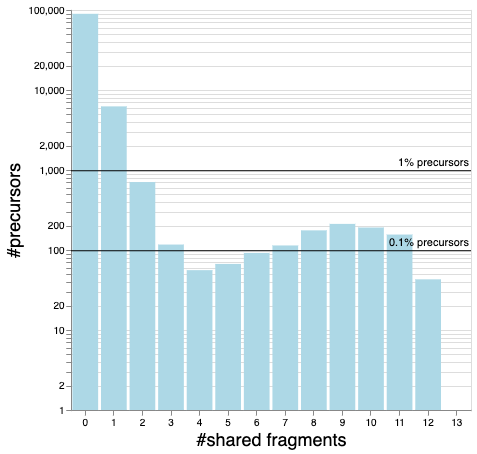

In [113]:
from IPython.display import Image
Image('shared_fragment_histogram.png')